In [1]:
# stacked generalization with linear meta model on blobs dataset
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#x_train  y_train to train
#x_test   y_test to test
#x_valid  y_valid 
#video
import joblib
x_test_prediction = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert4/test/pred_test')
x_train_prediction = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert4/train/pred_train')
x_valid_prediction = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert4/valid/pred_valid')
y_test = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert4/test/labels_test')
y_train = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert4/train/labels_train')
y_valid = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert4/valid/labels_valid')
#audio

x_audio_test_prediction = joblib.load('/content/drive/My Drive/fusion/final_audio/data_set_fusion/expert4/test/predict_test')
x_audio_train_prediction = joblib.load('/content/drive/My Drive/fusion/final_audio/data_set_fusion/expert4/train/predict_train')
x_audio_valid_prediction = joblib.load('/content/drive/My Drive/fusion/final_audio/data_set_fusion/expert4/valid/predict_valid')
"""
#samples name
test_videos= joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert4/test/video_test_path')
train_videos = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert4/train/video_train_path')
valid_videos = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert4/valid/video_valid_path')
"""

"\n#samples name\ntest_videos= joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert4/test/video_test_path')\ntrain_videos = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert4/train/video_train_path')\nvalid_videos = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert4/valid/video_valid_path')\n"

In [4]:
len(x_test_prediction),len(x_train_prediction),len(x_audio_test_prediction),len(x_audio_train_prediction),len(x_valid_prediction),len(x_audio_valid_prediction)

(207, 1653, 207, 1653, 207, 207)

In [5]:
#x_train for video
x_train_prediction=x_train_prediction.append(x_valid_prediction,ignore_index = True)
#x_train for audio
x_audio_train_prediction=x_audio_train_prediction.append(x_audio_valid_prediction,ignore_index = True)

In [6]:
len(x_audio_train_prediction),len(x_train_prediction)

(1860, 1860)

In [7]:
from pandas.core.frame import DataFrame
df_train=DataFrame(y_train,columns=['labels'])
df_valid=DataFrame(y_valid,columns=['labels'])

In [8]:
df_train=df_train.append(df_valid,ignore_index = True)

In [9]:
len(df_train)

1860

In [10]:
df_train

,labels
0,3
1,4
2,5
3,3
4,5
...,...
1855,4
1856,3
1857,5
1858,5


In [11]:
import pandas as pd

x_train = pd.concat([x_train_prediction, x_audio_train_prediction], axis=1,join='inner')
x_test =  pd.concat([x_test_prediction, x_audio_test_prediction], axis=1,join='inner')

In [12]:
x_test

,OV_0,OV_1,OV_2,OV_3,OV_4,OV_5,OA_0,OA_1,OA_2,OA_3,OA_4,OA_5
0,4.600655e-06,0.000157,9.997899e-01,0.000012,1.032134e-06,0.000035,5.456753e-05,1.220096e-08,9.929080e-01,4.043331e-06,6.188037e-03,8.453725e-04
1,4.257174e-06,0.000003,8.445079e-06,0.005218,9.794852e-05,0.994668,1.932068e-04,5.784202e-04,3.567998e-03,7.689722e-01,7.699829e-06,2.266804e-01
2,1.291070e-06,0.000097,9.998935e-01,0.000002,1.729752e-07,0.000006,5.105746e-06,1.983018e-05,8.609649e-01,1.715119e-04,1.875080e-02,1.200879e-01
3,1.267258e-06,0.000001,1.642191e-05,0.000334,1.060658e-04,0.999541,1.179721e-09,2.118236e-14,8.562396e-08,5.861786e-05,3.032232e-06,9.999384e-01
4,5.767955e-05,0.999416,1.630818e-04,0.000330,3.037682e-05,0.000002,1.235686e-11,1.000000e+00,3.994414e-08,6.263612e-11,7.486577e-14,1.012139e-15
...,...,...,...,...,...,...,...,...,...,...,...,...
202,9.926456e-01,0.002794,1.416627e-06,0.004482,1.063430e-05,0.000067,6.645822e-02,9.304284e-01,3.080240e-06,3.000102e-03,9.835899e-05,1.183406e-05
203,9.668189e-01,0.004124,1.504883e-06,0.028835,3.340599e-05,0.000186,9.924107e-01,1.436486e-03,2.948664e-03,3.045792e-03,1.566653e-04,1.790176e-06
204,6.655590e-07,0.000033,1.857604e-07,0.000006,9.999404e-01,0.000019,7.213436e-12,1.681738e-12,8.770765e-08,8.108627e-09,9.999994e-01,4.222395e-07
205,3.019764e-07,0.000008,2.230916e-06,0.000057,9.993665e-01,0.000566,2.577021e-08,1.049528e-06,9.888759e-01,1.203042e-07,1.112275e-02,1.157731e-07


In [13]:
len(x_test),len(x_train)

(207, 1860)

In [14]:
x_train

,OV_0,OV_1,OV_2,OV_3,OV_4,OV_5,OA_0,OA_1,OA_2,OA_3,OA_4,OA_5
0,6.563866e-06,3.023613e-04,3.476024e-06,0.999369,0.000005,0.000313,5.177724e-10,7.138308e-13,1.020156e-09,9.987187e-01,1.534214e-07,1.281176e-03
1,6.660532e-07,1.111468e-05,4.777901e-07,0.000003,0.999941,0.000044,1.785650e-12,1.030475e-11,1.101646e-04,1.760602e-13,9.998896e-01,2.042273e-07
2,3.196978e-06,1.084502e-06,6.119757e-05,0.000540,0.000130,0.999265,7.545241e-13,8.568947e-13,4.319692e-08,1.155002e-11,1.126641e-09,1.000000e+00
3,1.672899e-04,3.690411e-05,7.654433e-06,0.996621,0.000001,0.003166,1.549455e-05,3.719396e-12,3.052914e-14,9.999841e-01,6.506387e-09,3.034029e-07
4,6.228225e-06,2.223077e-06,1.080643e-04,0.000279,0.000155,0.999449,1.425842e-11,1.109101e-10,3.479363e-06,1.414401e-07,2.724932e-06,9.999937e-01
...,...,...,...,...,...,...,...,...,...,...,...,...
1855,2.267656e-06,5.500071e-05,6.257817e-05,0.000025,0.999060,0.000795,1.302324e-11,2.323093e-10,2.180573e-07,1.161515e-10,9.999996e-01,7.285048e-08
1856,5.436857e-06,4.640588e-05,2.539234e-07,0.999771,0.000002,0.000175,4.063354e-08,1.309378e-09,7.128327e-10,9.998521e-01,1.096601e-07,1.477708e-04
1857,2.219884e-06,1.371802e-06,1.270682e-05,0.001495,0.000036,0.998452,1.649622e-07,9.376996e-06,1.547669e-02,1.619260e-02,4.480119e-05,9.682764e-01
1858,1.302802e-06,1.391211e-06,2.840016e-05,0.000200,0.000314,0.999455,9.008205e-08,8.905898e-08,1.474547e-01,6.102984e-05,5.394769e-01,3.130072e-01


In [15]:
from sklearn.utils import shuffle
seed=42
new_x_train = shuffle(x_train,random_state=seed)
new_y_train = shuffle(df_train,random_state=seed)
new_x_train = new_x_train.reset_index(drop=True)
new_y_train = new_y_train.reset_index(drop=True)
"""
y_train=df_train.to_numpy()
y_train=y_train.reshape(1860,)
y_train, y_train.shape
"""

'\ny_train=df_train.to_numpy()\ny_train=y_train.reshape(1860,)\ny_train, y_train.shape\n'

In [16]:
len(new_y_train)

1860

In [17]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
new_x_train = scaler.fit_transform(new_x_train)
X_test = scaler.transform(x_test)

In [18]:
y_train=df_train.to_numpy()
y_train=y_train.reshape(1860,)
y_train, y_train.shape

(array([3, 4, 5, ..., 5, 5, 5]), (1860,))

# training machine learning

In [19]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class='multinomial')
LR=model.fit(new_x_train,new_y_train)
predictions = model.predict(x_test)
#print("Restored model, accuracy: {:5.2f}%".format(100*acc))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [20]:
predictions

array([2, 5, 2, 5, 1, 1, 5, 1, 5, 5, 1, 2, 3, 0, 4, 2, 2, 3, 0, 1, 3, 2,
       3, 5, 3, 2, 4, 1, 4, 4, 1, 3, 0, 1, 2, 1, 4, 1, 4, 2, 4, 3, 1, 3,
       1, 4, 3, 3, 1, 4, 5, 2, 2, 3, 1, 2, 2, 1, 1, 1, 5, 1, 4, 2, 0, 2,
       5, 0, 1, 5, 4, 5, 2, 2, 3, 4, 5, 5, 2, 2, 2, 5, 2, 5, 4, 1, 2, 5,
       0, 4, 2, 4, 5, 4, 3, 5, 5, 4, 4, 1, 0, 4, 1, 4, 3, 4, 1, 1, 5, 0,
       2, 5, 2, 1, 4, 4, 5, 0, 4, 2, 1, 3, 0, 3, 1, 3, 2, 2, 4, 3, 5, 1,
       4, 4, 0, 2, 2, 2, 4, 4, 3, 2, 0, 4, 1, 4, 4, 2, 2, 4, 2, 3, 4, 0,
       2, 5, 5, 4, 4, 1, 1, 5, 0, 1, 5, 1, 4, 4, 1, 5, 2, 4, 0, 0, 5, 1,
       0, 2, 5, 2, 4, 5, 5, 4, 3, 1, 3, 3, 0, 5, 2, 2, 1, 4, 2, 5, 0, 3,
       3, 2, 2, 3, 1, 0, 4, 4, 5])

              precision    recall  f1-score   support

           0       0.90      0.95      0.92        19
           1       0.95      0.90      0.92        40
           2       1.00      0.98      0.99        45
           3       0.85      0.92      0.88        24
           4       0.98      1.00      0.99        43
           5       0.94      0.92      0.93        36

    accuracy                           0.95       207
   macro avg       0.94      0.94      0.94       207
weighted avg       0.95      0.95      0.95       207

----accuracy score 94.68599033816425 ----


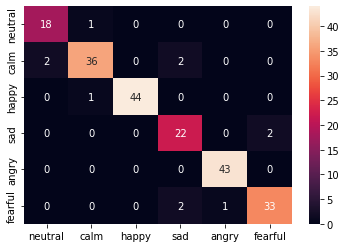

In [21]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import seaborn as sn
import matplotlib.pyplot as plt

print(classification_report(y_test,predictions))

acc = float(accuracy_score(y_test,predictions))*100
print("----accuracy score %s ----" % acc)

cm = confusion_matrix(y_test,predictions)
#df_cm = pd.DataFrame(cm)
class_names = ['neutral','calm', 'happy','sad','angry', 'fearful' ]
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names,)
sn.heatmap(df_cm, annot=True, fmt='')
plt.show()

In [22]:
path='/content/drive/MyDrive/LR_RESULTS/expert4'
savedvX = joblib.dump(model, path)

print("MODEL SAVED")

MODEL SAVED
